In [23]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()  # upload archive.zip

zip_path = "archive.zip"
extract_path = "extracted_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


Saving archive.zip to archive (3).zip


['heart_disease_uci.csv']

In [24]:
import pandas as pd

csv_path = os.path.join(extract_path, "heart_disease_uci.csv")
df = pd.read_csv(csv_path)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [25]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

# Fill missing numeric values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode 'sex' manually
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Encode other categorical columns using factorize (skip 'sex')
for col in cat_cols:
    if col != 'sex':
        df[col] = pd.factorize(df[col])[0]

print(df.isnull().sum())  # Check no missing values remain
print(df.describe())


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
               id         age         sex     dataset          cp    trestbps  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870    0.789130    1.238043    1.550000  131.995652   
std    265.725422    9.424685    0.408148    1.130673    0.852379   18.451300   
min      1.000000   28.000000    0.000000    0.000000    0.000000    0.000000   
25%    230.750000   47.000000    1.000000    0.000000    1.000000  120.000000   
50%    460.500000   54.000000    1.000000    1.000000    1.000000  130.000000   
75%    690.250000   60.000000    1.000000    2.000000    2.000000  140.000000   
max    920.000000   77.000000    1.000000    3.000000    3.000000  200.000000   

             chol         fbs    

<ipython-input-25-c9ba5dbdb08c>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


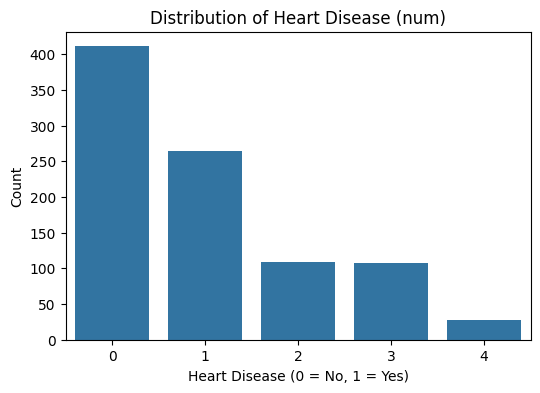

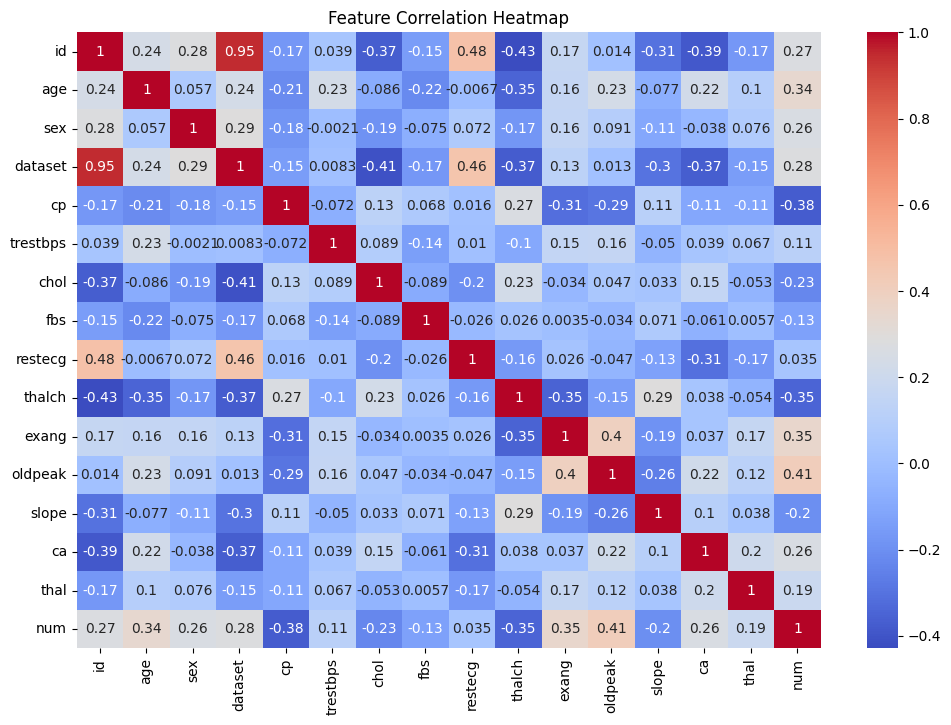

In [34]:
# import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for heart disease distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df)
plt.title('Distribution of Heart Disease (num)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [27]:
# Drop 'id' and separate target
X = df.drop(columns=['num', 'id'])
y = df['num']

# Convert target to binary (0 = no disease, 1 = disease)
y = y.apply(lambda x: 0 if x == 0 else 1)

print(X.shape, y.shape)



(920, 14) (920,)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)


(736, 14) (184, 14)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8478260869565217

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



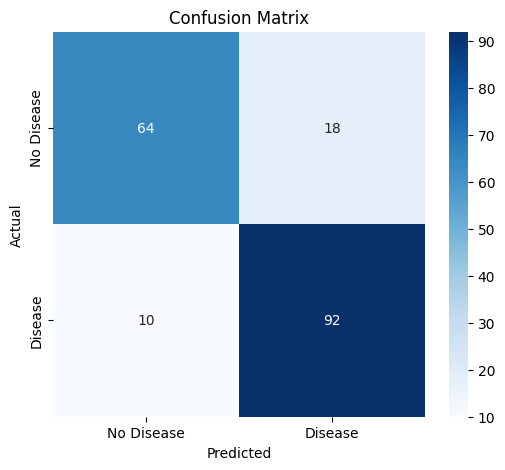

In [32]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
